TensorFlow programming is essentially a two-step process:

- Assemble constants, variables, and operations into a graph.
- Evaluate those constants, variables and operations within a session.

In [9]:
import tensorflow as tf
# Create a graph.
g = tf.Graph()

# Establish the graph as the "default" graph.
with g.as_default():
    # Assemble a graph consisting of the following three operations:
    #   * Two tf.constant operations to create the operands.
    #   * One tf.add operation to add the two operands.
    x = tf.constant(8, name="x_const")
    y = tf.constant(5, name="y_const")
    my_sum = tf.add(x, y, name="x_y_sum")


    # Now create a session.
    # The session will run the default graph.
    with tf.Session() as sess:
        print(my_sum.eval())

13


In [10]:
# Create a graph.
g = tf.Graph()

# Establish the graph as the "default" graph.
with g.as_default():
    # Assemble a graph consisting of the following three operations:
    #   * Two tf.constant operations to create the operands.
    #   * One tf.add operation to add the two operands.
    x = tf.constant(8, name="x_const")
    y = tf.constant(5, name="y_const")
    z = tf.constant(4, name="z_const")
    sub_sum = tf.add(x, y, name="x_y_sum")
    my_sum = tf.add(sub_sum, z, name="x_y_z_sum")


    # Now create a session.
    # The session will run the default graph.
    with tf.Session() as sess:
        print(my_sum.eval())

17


### Mandelbrot Set
Visualizing the Mandelbrot set doesn't have anything to do with machine learning, but it makes for a fun example of how one can use TensorFlow for general mathematics. This is actually a pretty naive implementation of the visualization, but it makes the point. (We may end up providing a more elaborate implementation down the line to produce more truly beautiful images.)

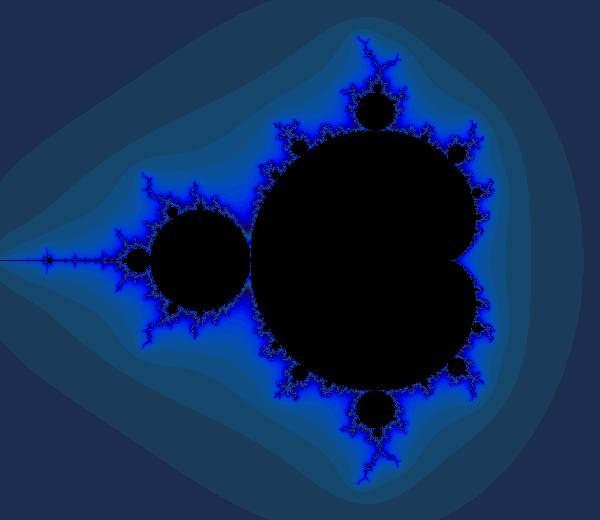

In [13]:
import numpy as np

# Imports for visualization
import PIL.Image
from io import BytesIO
from IPython.display import Image, display

def DisplayFractal(a, fmt='jpeg'):
    """Display an array of iteration counts as a
     colorful picture of a fractal."""
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([10+20*np.cos(a_cyclic),
                        30+50*np.sin(a_cyclic),
                        155-80*np.cos(a_cyclic)], 2)
    img[a==a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))
    

sess = tf.InteractiveSession()

# Use NumPy to create a 2D array of complex numbers

Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
Z = X+1j*Y

xs = tf.constant(Z.astype(np.complex64))
zs = tf.Variable(xs)
ns = tf.Variable(tf.zeros_like(xs, tf.float32))

tf.global_variables_initializer().run() #explicitly initialize variables before using them.

# Compute the new values of z: z^2 + x
zs_ = zs*zs + xs

# Have we diverged with this new value?
not_diverged = tf.abs(zs_) < 4

# Operation to update the zs and the iteration count.
#
# Note: We keep computing zs after they diverge! This
#       is very wasteful! There are better, if a little
#       less simple, ways to do this.
#
step = tf.group(
    zs.assign(zs_),
    ns.assign_add(tf.cast(not_diverged, tf.float32))
)

for i in range(300): step.run()
 

DisplayFractal(ns.eval())

sess.close()